# Roboflow Data Perparation

The current dataset contains thousands of images only a few with the "curated" flag. Roboflow does not allow to select only the ones without the curated tag. 

Here we try to import and re-export the data with only curated data. -> the tag is not exported. 


Trick used: copy the filtered data directly from the website and create a list of curated image files, export the whole dataset but delete the images not in the list. When reimporting the data, the annotation without images are ignored. 





In [1]:
import roboflow

In [2]:
roboflow.login()


visit https://app.roboflow.com/auth-cli to get your authentication token.


Paste the authentication token here:  ········


In [55]:
rf = roboflow.Roboflow()
workspace = rf.workspace()

loading Roboflow workspace...


In [78]:
project = rf.workspace().project("merged_projects_1")
version = project.version("2")
#project.generate_version(settings={}) -> no parameters for split balance

loading Roboflow workspace...
loading Roboflow project...


----

In [79]:
!ls ../../../0_DATA/IMPTOX/01-01_image_library/V4/download

README.dataset.txt  README.roboflow.txt  train


In [86]:
download_folder = "../../../0_DATA/IMPTOX/01-01_image_library/V4/download/"

In [87]:
version.download(model_format="coco", location=download_folder)

Extracting Dataset Version Zip to ../../../0_DATA/IMPTOX/01-01_image_library/V4/download/ in coco:: 100%|█| 3002/3002 [00:09<00:00, 327


In [91]:
# https://leimao.github.io/blog/Inspecting-COCO-Dataset-Using-COCO-API/

from pycocotools.coco import COCO

coco_annotation_file_path = "../../../0_DATA/IMPTOX/01-01_image_library/V4/download/train/_annotations.coco.json"
coco_annotation = COCO(annotation_file=coco_annotation_file_path)




loading annotations into memory...
Done (t=0.62s)
creating index...
index created!


In [92]:
# Category IDs.
cat_ids = coco_annotation.getCatIds()
print(f"Number of Unique Categories: {len(cat_ids)}")
print("Category IDs:")
print(cat_ids)  # The IDs are not necessarily consecutive.



Number of Unique Categories: 2
Category IDs:
[0, 1]


In [93]:
# All categories.
cats = coco_annotation.loadCats(cat_ids)
cat_names = [cat["name"] for cat in cats]
print("Categories Names:")
print(cat_names)



Categories Names:
['particle', 'particle']


In [94]:
# Category ID -> Category Name.
query_id = cat_ids[1]
query_annotation = coco_annotation.loadCats([query_id])[0]
query_name = query_annotation["name"]
query_supercategory = query_annotation["supercategory"]
print("Category ID -> Category Name:")
print(
    f"Category ID: {query_id}, Category Name: {query_name}, Supercategory: {query_supercategory}"
)



Category ID -> Category Name:
Category ID: 1, Category Name: particle, Supercategory: particle


In [95]:
# Category Name -> Category ID.
query_name = cat_names[1]
query_id = coco_annotation.getCatIds(catNms=[query_name])[1]
print("Category Name -> ID:")
print(f"Category Name: {query_name}, Category ID: {query_id}")



Category Name -> ID:
Category Name: particle, Category ID: 1


In [96]:
# Get the ID of all the images containing the object of the category.
img_ids = coco_annotation.getImgIds(catIds=[query_id])
print(f"Number of Images Containing {query_name}: {len(img_ids)}")



Number of Images Containing particle: 684


In [97]:
img_info

{'id': 0,
 'license': 1,
 'file_name': '8-59_jpg.rf.00238aa7df8ac91fbb694190e6a9c62d.jpg',
 'height': 480,
 'width': 752,
 'date_captured': '2023-07-25T10:39:33+00:00'}

In [66]:
# Pick one image.
img_id = img_ids[0]
img_info = coco_annotation.loadImgs([img_id])[0]
img_file_name = img_info["file_name"]
img_path = "../../../0_DATA/IMPTOX/01-01_image_library/V4/download/train/" + img_file_name
#img_url = img_info["coco_url"]
print(
    f"Image ID: {img_id}, File Name: {img_file_name}"
)



Image ID: 0, File Name: 8-59_jpg.rf.00238aa7df8ac91fbb694190e6a9c62d.jpg


Annotations for Image ID 0:


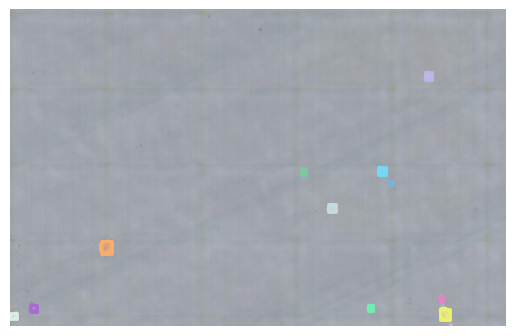

In [67]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Get all the annotations for the specified image.
ann_ids = coco_annotation.getAnnIds(imgIds=[img_id], iscrowd=None)
anns = coco_annotation.loadAnns(ann_ids)
print(f"Annotations for Image ID {img_id}:")
#print(anns)

# Use URL to load image.
im = Image.open(img_path)

# Save image and its labeled version.
plt.axis("off")
plt.imshow(np.asarray(im))
plt.savefig(f"{img_id}.jpg", bbox_inches="tight", pad_inches=0)
# Plot segmentation and bounding box.
coco_annotation.showAnns(anns, draw_bbox=True)
#plt.savefig(f"{img_id}_annotated.jpg", bbox_inches="tight", pad_inches=0)


# Load name list and remove non-curated images from dataset




In [73]:
curated_list_path = "../../../0_DATA/IMPTOX/01-01_image_library/V4/curated_images_list.txt"

with open(curated_list_path) as f:
    list_curated = f.read().splitlines()

print(list_curated)

['0_2_cr_WP4_SRB_1_FR_1_Mozaik.jpg', '0_3_cr_WP4_SRB_1_FR_1_Mozaik.jpg', '0_4_cr_WP4_SRB_1_FR_1_Mozaik.jpg', '10_2_cr_WP4_SRB_1_M_2_Mozaik.jpg', '11_1_cr_WP4_SRB_1_M_4_Mozaik.jpg', '11_2_cr_WP4_SRB_1_M_4_Mozaik.jpg', '11_3_cr_WP4_SRB_1_M_4_Mozaik.jpg', '0_0_cr_WP4_SRB_1_FR_1_Mozaik.jpg', '11_0_cr_WP4_SRB_1_M_4_Mozaik.jpg', '0_1_cr_WP4_SRB_1_FR_1_Mozaik.jpg', '12_5_cr_WP4_SRB_1_M_5_Mozaik.jpg', '12_3_cr_WP4_SRB_1_M_5_Mozaik.jpg', '11_5_cr_WP4_SRB_1_M_4_Mozaik.jpg', '1_2_cr_WP4_SRB_1_FR_3_Mozaik.jpg', '13_3_cr_WP4_SRB_1_M_B6_Mosaic.jpg', '12_4_cr_WP4_SRB_1_M_5_Mozaik.jpg', '3_1_cr_WP4_SRB_1_FR_5_Mozaik.jpg', '13_4_cr_WP4_SRB_1_M_B6_Mosaic.jpg', '1_6_cr_WP4_SRB_1_FR_3_Mozaik.jpg', '4_2_cr_WP4_SRB_1_FRESH_1_Mozaik.jpg', '1_4_cr_WP4_SRB_1_FR_3_Mozaik.jpg', '2_8_cr_WP4_SRB_1_FR_4_Mozaik.jpg', '1_1_cr_WP4_SRB_1_FR_3_Mozaik.jpg', '8_0_cr_WP4_SRB_1_FRESH_5_Mozaik.jpg', '6_6_cr_WP4_SRB_1_FRESH_3_Mozaik.jpg', '5_1_cr_WP4_SRB_1_FRESH_2_Mozaik.jpg', '6_3_cr_WP4_SRB_1_FRESH_3_Mozaik.jpg', '8_7_cr_WP

### A simple solution could be to just delete the images not curated and upload the dataset to Roboflow that should ignore the missing imgs. 


In [88]:
selected_images = list_curated + ["_annotations.coco.json"]
directory_path = "../../../0_DATA/IMPTOX/01-01_image_library/V4/download/train/"


print(selected_images)

['0_2_cr_WP4_SRB_1_FR_1_Mozaik.jpg', '0_3_cr_WP4_SRB_1_FR_1_Mozaik.jpg', '0_4_cr_WP4_SRB_1_FR_1_Mozaik.jpg', '10_2_cr_WP4_SRB_1_M_2_Mozaik.jpg', '11_1_cr_WP4_SRB_1_M_4_Mozaik.jpg', '11_2_cr_WP4_SRB_1_M_4_Mozaik.jpg', '11_3_cr_WP4_SRB_1_M_4_Mozaik.jpg', '0_0_cr_WP4_SRB_1_FR_1_Mozaik.jpg', '11_0_cr_WP4_SRB_1_M_4_Mozaik.jpg', '0_1_cr_WP4_SRB_1_FR_1_Mozaik.jpg', '12_5_cr_WP4_SRB_1_M_5_Mozaik.jpg', '12_3_cr_WP4_SRB_1_M_5_Mozaik.jpg', '11_5_cr_WP4_SRB_1_M_4_Mozaik.jpg', '1_2_cr_WP4_SRB_1_FR_3_Mozaik.jpg', '13_3_cr_WP4_SRB_1_M_B6_Mosaic.jpg', '12_4_cr_WP4_SRB_1_M_5_Mozaik.jpg', '3_1_cr_WP4_SRB_1_FR_5_Mozaik.jpg', '13_4_cr_WP4_SRB_1_M_B6_Mosaic.jpg', '1_6_cr_WP4_SRB_1_FR_3_Mozaik.jpg', '4_2_cr_WP4_SRB_1_FRESH_1_Mozaik.jpg', '1_4_cr_WP4_SRB_1_FR_3_Mozaik.jpg', '2_8_cr_WP4_SRB_1_FR_4_Mozaik.jpg', '1_1_cr_WP4_SRB_1_FR_3_Mozaik.jpg', '8_0_cr_WP4_SRB_1_FRESH_5_Mozaik.jpg', '6_6_cr_WP4_SRB_1_FRESH_3_Mozaik.jpg', '5_1_cr_WP4_SRB_1_FRESH_2_Mozaik.jpg', '6_3_cr_WP4_SRB_1_FRESH_3_Mozaik.jpg', '8_7_cr_WP

In [90]:
import os

for filename in os.listdir(directory_path):
    file_path = os.path.join(directory_path, filename)
    
    if "_jpg.rf" in file_path:
        # Get the index of the last occurrence of "."
        last_dot_index = filename.rfind(".")

        # Remove everything from "_jpg" included to the last "." not included
        new_filename = filename[:filename.find("_jpg")] + filename[last_dot_index:]

        # Rename the file
        new_file_path = os.path.join(directory_path, new_filename)
        #os.rename(file_path, new_file_path)
        
    
    # Check if the file is not in the list of selected images and delete it
    if new_filename not in selected_images:
        if "_annotations.coco.json" not in file_path:
            os.remove(file_path)